In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import topmed_manuscript_clean as tm

PREFIX = 'Fig4A.'
METADATA = '../../manuscript-intermediate-processing/data/metadata/metadata.tm.txt'
metadata = pd.read_csv(METADATA, sep='\t')

In [2]:
sample_size_dict = metadata[metadata.used_for_scan].groupby('tissue').size().to_dict()
tissue_order = list(sorted(sample_size_dict.keys(), key=lambda x: sample_size_dict[x], reverse=False))

In [3]:
all_gwas_signals = pd.read_csv('/net/topmed11/working/porchard/panukbb-finemapping/work/ancestry-specific-finemapping/lift-susie/results/susie-cs-and-convergence/gwas.cs.txt', sep='\t', header=None, names=['variant_id', 'cs_id', 'pip', 'trait_ancestry_region'])
all_gwas_signals.head()

,variant_id,cs_id,pip,trait_ancestry_region
0,chr17_40608272_T_A,L1,0.999999,categorical-6152-both_sexes-100___EUR___chr17_...
1,chr17_39872381_G_T,L2,0.003558,categorical-6152-both_sexes-100___EUR___chr17_...
2,chr17_39886524_T_A,L2,0.003599,categorical-6152-both_sexes-100___EUR___chr17_...
3,chr17_39887090_G_A,L2,0.003599,categorical-6152-both_sexes-100___EUR___chr17_...
4,chr17_39891991_T_C,L2,0.003592,categorical-6152-both_sexes-100___EUR___chr17_...


In [4]:
gwas_convergence = pd.read_csv('/net/topmed11/working/porchard/panukbb-finemapping/work/ancestry-specific-finemapping/lift-susie/results/susie-cs-and-convergence/gwas.converged.txt', sep='\t', header=None, names=['trait_ancestry_region', 'converged'])
gwas_convergence.head()

,trait_ancestry_region,converged
0,categorical-6152-both_sexes-100___EUR___chr17_...,True
1,categorical-6152-both_sexes-100___EUR___chr17_...,True
2,categorical-6152-both_sexes-100___EUR___chr17_...,True
3,categorical-6152-both_sexes-100___EUR___chr17_...,True
4,categorical-6152-both_sexes-100___EUR___chr17_...,True


In [5]:
gwas_convergence[~gwas_convergence.converged]

,trait_ancestry_region,converged
859,biomarkers-30830-both_sexes-irnt___EUR___chr17...,False
3766,continuous-30040-both_sexes-irnt___EUR___chr6_...,False
5898,categorical-1747-both_sexes-4___EUR___chr15_26...,False
10513,continuous-1717-both_sexes___EUR___chr11_87832...,False
10537,continuous-1717-both_sexes___EUR___chr15_27022...,False
10551,continuous-1717-both_sexes___EUR___chr16_87151...,False
17727,biomarkers-30610-both_sexes-irnt___EUR___chr17...,False


In [6]:
all_gwas_signals = all_gwas_signals.merge(gwas_convergence, validate='many_to_one')
all_gwas_signals = all_gwas_signals[all_gwas_signals.converged]


'we colocalized independent e/sQTL signals with {:,} fine-mapped EUR GWAS signals from {} UK Biobank traits (TABLE; we finemapped AFR GWAS signals as well but only {:,} AFR GWAS credible sets were discovered due to small sample size'.format(
    len(all_gwas_signals.loc[all_gwas_signals.trait_ancestry_region.str.contains('___EUR___'),['trait_ancestry_region', 'cs_id']].drop_duplicates()),
    all_gwas_signals[all_gwas_signals.trait_ancestry_region.str.contains('___EUR___')].trait_ancestry_region.str.split('___', expand=True)[0].nunique(),
    len(all_gwas_signals.loc[all_gwas_signals.trait_ancestry_region.str.contains('___AFR___'),['trait_ancestry_region', 'cs_id']].drop_duplicates()),
)



'we colocalized independent e/sQTL signals with 34,107 fine-mapped EUR GWAS signals from 164 UK Biobank traits (TABLE; we finemapped AFR GWAS signals as well but only 96 AFR GWAS credible sets were discovered due to small sample size'

In [7]:
all_gwas_signals = all_gwas_signals[all_gwas_signals.trait_ancestry_region.str.contains('___EUR___')]
number_total_signals = len(all_gwas_signals[['trait_ancestry_region', 'cs_id']].drop_duplicates())

In [8]:
coloced_joint = pd.read_csv('../../manuscript-intermediate-processing/work/coloc/panukbb/joint/postprocessed.txt', sep='\t')
coloced_ancestry_specific = pd.read_csv('../../manuscript-intermediate-processing/work/coloc/panukbb/ancestry-specific/postprocessed.txt', sep='\t')
coloced_joint = coloced_joint[(coloced_joint.xqtl_maf!='0.1%')]
coloced_ancestry_specific = coloced_ancestry_specific[(coloced_ancestry_specific.xqtl_maf!='0.1%')]

In [9]:
# narrow to EUR GWAS
coloced_joint = coloced_joint[coloced_joint.gwas_ancestry=='EUR']
coloced_ancestry_specific = coloced_ancestry_specific[coloced_ancestry_specific.gwas_ancestry=='EUR']

In [10]:
# barplot of number of GWAS signals colocing with each tissue/modality
n_gwas_signals_coloced_joint = coloced_joint[['xqtl_modality', 'xqtl_tissue', 'xqtl_maf', 'gwas_signal', 'gwas_cs']].drop_duplicates().groupby(['xqtl_modality', 'xqtl_tissue', 'xqtl_maf']).size().rename('gwas_signals').reset_index()
n_gwas_signals_coloced_ancestry_specific = coloced_ancestry_specific[['xqtl_modality', 'xqtl_tissue', 'xqtl_maf', 'gwas_signal', 'gwas_cs']].drop_duplicates().groupby(['xqtl_modality', 'xqtl_tissue', 'xqtl_maf']).size().rename('gwas_signals').reset_index()
n_gwas_signals_coloced_joint['xqtl_modality'] = n_gwas_signals_coloced_joint['xqtl_modality'].map(tm.format_modality)
n_gwas_signals_coloced_ancestry_specific['xqtl_modality'] = n_gwas_signals_coloced_ancestry_specific['xqtl_modality'].map(tm.format_modality)
n_gwas_signals_coloced_joint.head()

,xqtl_modality,xqtl_tissue,xqtl_maf,gwas_signals
0,cis-eQTL,Lung,1%,4065
1,cis-eQTL,Monocyte,1%,2058
2,cis-eQTL,Nasal_epithelial,1%,2240
3,cis-eQTL,PBMC,1%,3613
4,cis-eQTL,T_cell,1%,2200


In [11]:
n_gwas_signals_coloced_joint['fraction_gwas_signals'] = n_gwas_signals_coloced_joint['gwas_signals'] / number_total_signals
n_gwas_signals_coloced_joint.head()

,xqtl_modality,xqtl_tissue,xqtl_maf,gwas_signals,fraction_gwas_signals
0,cis-eQTL,Lung,1%,4065,0.119184
1,cis-eQTL,Monocyte,1%,2058,0.060340
2,cis-eQTL,Nasal_epithelial,1%,2240,0.065676
3,cis-eQTL,PBMC,1%,3613,0.105931
4,cis-eQTL,T_cell,1%,2200,0.064503


In [12]:
def calculate_dodge(items, width=0.8):
    number_bars = len(items)
    bar_width = width / number_bars
    bar_starts = [(1-width)/2 + i*bar_width - 0.5 for i in range(number_bars)]
    bar_centers = [i+bar_width/2 for i in bar_starts]
    return bar_centers

tissue_to_dodge = dict(zip(tissue_order[::-1], calculate_dodge(tissue_order)))

/tmp/ipykernel_3991648/2243172071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = [modality_to_y[modality] + tissue_to_dodge[tissue] for tissue, modality in zip(df.xqtl_tissue, df.xqtl_modality)]
/tmp/ipykernel_3991648/2243172071.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = [modality_to_y[modality] + tissue_to_dodge[tissue] for tissue, modality in zip(df.xqtl_tissue, df.xqtl_modality)]


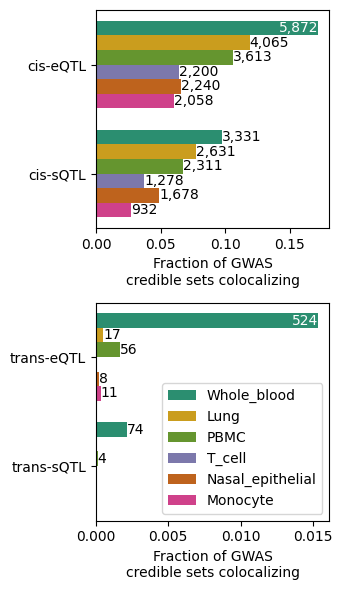

In [13]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(3.5, 3*2))

tmp = n_gwas_signals_coloced_joint[n_gwas_signals_coloced_joint.xqtl_maf!='0.1%']
tmp.xqtl_tissue = pd.Categorical(tmp.xqtl_tissue, tissue_order[::-1], ordered=True)

df = tmp[tmp.xqtl_modality.str.contains('cis')]
modality_to_y = {j: i for i, j in enumerate(df.xqtl_modality.unique())}
df['y'] = [modality_to_y[modality] + tissue_to_dodge[tissue] for tissue, modality in zip(df.xqtl_tissue, df.xqtl_modality)]

ax = axs[0]
sns.barplot(y='xqtl_modality', x='fraction_gwas_signals', hue='xqtl_tissue', palette=tm.palettes['tissue'], data=df, ax=ax)
ax.set_xlabel('Fraction of GWAS\ncredible sets colocalizing')
ax.set_ylabel('')
ax.legend().remove()
[ax.text(x=fraction_gwas_signals, y=y, s='{:,}'.format(gwas_signals), color='black' if gwas_signals < 0.9 * df.gwas_signals.max() else 'white', ha='left' if gwas_signals < 0.9 * df.gwas_signals.max() else 'right', va='center') for fraction_gwas_signals, y, gwas_signals in zip(df.fraction_gwas_signals, df.y, df.gwas_signals)]

df = tmp[tmp.xqtl_modality.str.contains('trans')]
modality_to_y = {j: i for i, j in enumerate(df.xqtl_modality.unique())}
df['y'] = [modality_to_y[modality] + tissue_to_dodge[tissue] for tissue, modality in zip(df.xqtl_tissue, df.xqtl_modality)]

ax = axs[1]
sns.barplot(y='xqtl_modality', x='fraction_gwas_signals', hue='xqtl_tissue', palette=tm.palettes['tissue'], data=tmp[tmp.xqtl_modality.str.contains('trans')], ax=ax)
ax.set_xlabel('Fraction of GWAS\ncredible sets colocalizing')
ax.set_ylabel('')
[ax.text(x=fraction_gwas_signals, y=y, s='{:,}'.format(gwas_signals), color='black' if gwas_signals < 0.9 * df.gwas_signals.max() else 'white', ha='left' if gwas_signals < 0.9 * df.gwas_signals.max() else 'right', va='center') for fraction_gwas_signals, y, gwas_signals in zip(df.fraction_gwas_signals, df.y, df.gwas_signals)]
ax.legend(loc='lower right').set_title('')


fig.tight_layout()
fig.savefig(f'figures/{PREFIX}png', dpi=300, facecolor='white', bbox_inches='tight')